In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from copy import copy

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [61]:
region = 'NPSG'
mortality = 0.39              # [d-1]
runtime = 20                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = ['fixed', 'markov_0_KPP_reflect']
sizebinedges = [1e-3, 0.5e-3, 1e-4, 1e-5, 1e-6]

In [62]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[0]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_bfadv_Jan_2004_0'+str(mortality)[2:]+'mort_'+mixing[1]+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [63]:
ds_1['w_m'][5]

<xarray.DataArray 'w_m' (obs: 41)>
array([ 0.000000e+00, -5.409474e-03,  3.571304e-03,  5.038375e-03,
        3.441254e-04, -1.020838e-03,  1.392224e-03, -4.311861e-03,
        5.240692e-03,  1.608015e-03,  1.437242e-03,  1.541210e-03,
       -2.049880e-03, -1.796460e-03, -4.348640e-03, -4.658224e-03,
        2.291502e-03, -3.694646e-03,  4.574446e-03,  8.684726e-04,
        1.937139e-03,  5.374920e-03,  1.096701e-03,  7.015067e-04,
       -9.576865e-05,  5.301264e-03, -1.958330e-03, -4.177690e-03,
       -2.547122e-03, -5.692265e-03,  3.327094e-03, -5.801329e-03,
       -2.764212e-03, -2.611392e-03,  1.136209e-03, -2.070131e-03,
        4.407263e-03, -1.570599e-03,  3.368697e-03,  3.513682e-03,
        1.590231e-03], dtype=float32)
Dimensions without coordinates: obs
Attributes:
    long_name:      
    standard_name:  w_m
    units:          unknown

In [64]:
dslist = [ds_0, ds_1]

In [65]:
times = ds_0['time'][0,:].astype('O')
timelabels = ds_0['time'][0,:].dt.strftime('%Y-%m-%d')

In [66]:
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue']

In [67]:
number_of_trajectories_to_plot = 100
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 100 of 10000 trajectories
plotting every 100 particles


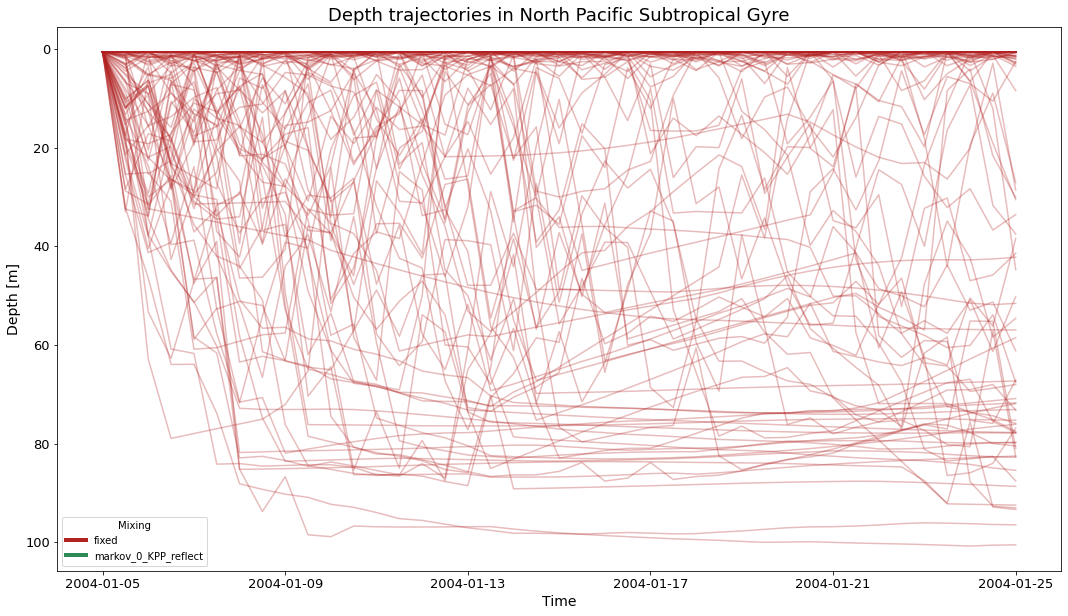

In [68]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].T[:,::f_plt], dslist[i]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])
# ax.plot(ds['time'].T[:,::f_plt], ds['z'].T[:,::f_plt], c=mixing_cmap[2], alpha=0.3, label = mixing[1])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('Depth [m]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
# ax.set_ylim(100,0)
ax.tick_params(axis='both', labelsize=13)
ax.invert_yaxis()
# ax.set_xticks(times[::6].values)
# ax.set_xticklabels(timelabels[::6].values)
# ax.tick_params(axis='x', rotation=45)

custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                Line2D([0], [0], color=mixing_cmap[1], lw=4)]

ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

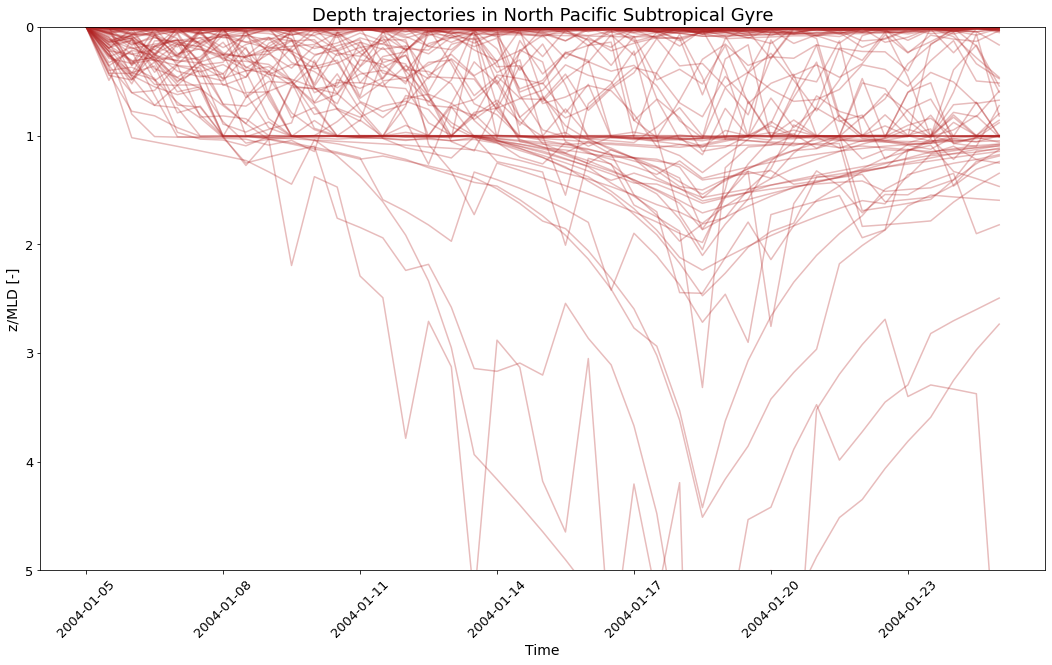

In [69]:
fig = plt.figure(figsize=(18,10))
ax = plt.axes()

for i in range(len(dslist)):
    ax.plot(dslist[i]['time'].astype('O').T[:,::f_plt], dslist[i]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[0])

ax.set_title('Depth trajectories in '+regions[region], fontsize=18)
ax.set_ylabel('z/MLD [-]', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticks(times[::6].values)
ax.set_xticklabels(timelabels[::6].values)
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(5,0)
plt.show()

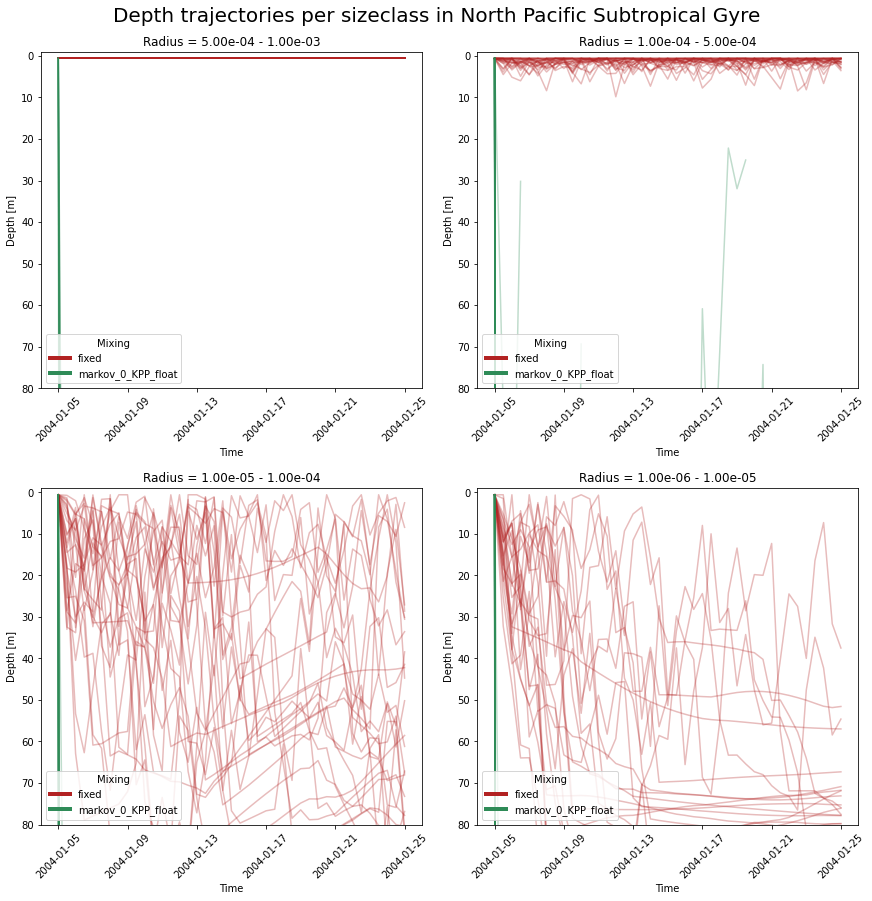

In [55]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]

for r, ax in enumerate(axes):
    for i in range(len(mixing)):
        split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
        ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['z'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(80,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                    Line2D([0], [0], color=mixing_cmap[1], lw=4)]

    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

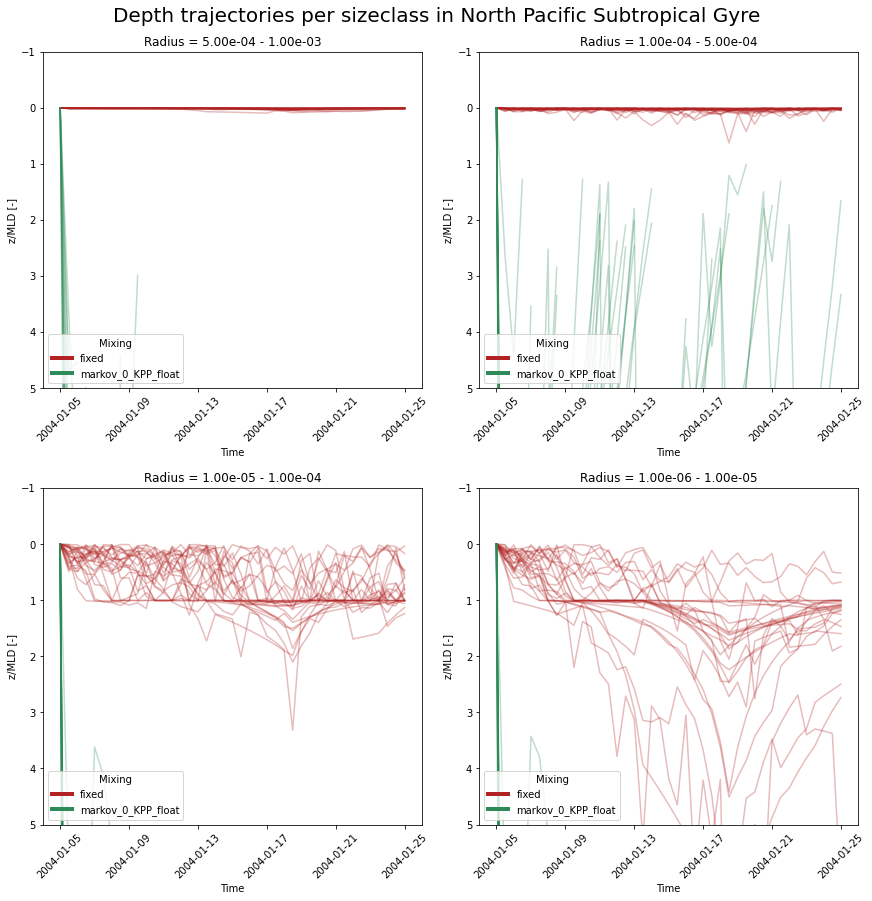

In [56]:
fig = plt.figure(figsize=(12,12), constrained_layout=True)
fig.suptitle('Depth trajectories per sizeclass in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [ax1, ax2, ax3, ax4]

for r, ax in enumerate(axes):
    for i in range(len(mixing)):
        split_ds = list(dslist[i].groupby_bins('r_pl',sizebinedges[::-1]))
        ax.plot(split_ds[r][1]['time'].T[:,::f_plt], split_ds[r][1]['mld'].T[:,::f_plt], c=mixing_cmap[i], alpha=0.3, label = mixing[i])

    ax.set_title('Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[r][0].left, right=split_ds[r][0].right))
    ax.set_ylabel('z/MLD [-]')
    ax.set_xlabel('Time')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(5,-1)

    custom_lines = [Line2D([0], [0], color=mixing_cmap[0], lw=4),
                    Line2D([0], [0], color=mixing_cmap[1], lw=4)]

#     ax.invert_yaxis()
    ax.legend(custom_lines, [mixing[0], mixing[1]], title='Mixing', loc='lower left')
plt.show()

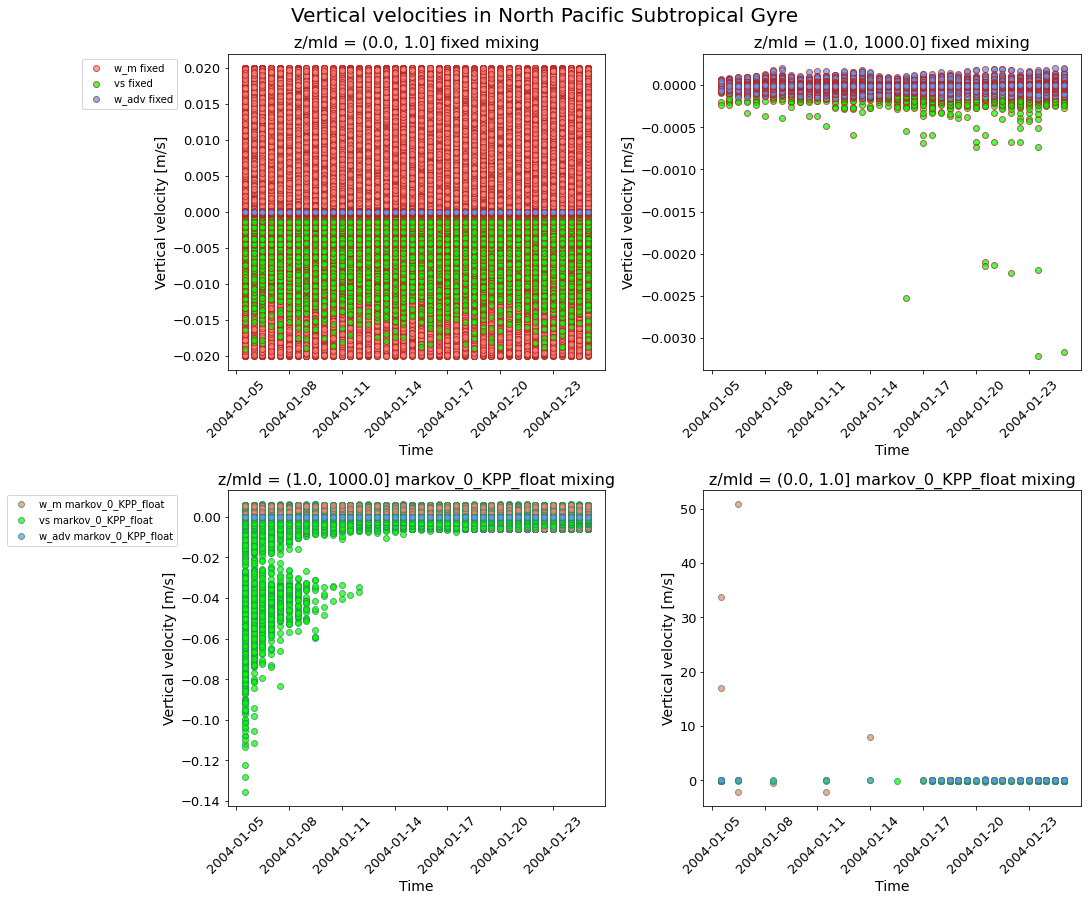

In [57]:
fig = plt.figure(figsize=(15,12),constrained_layout=True)
fig.suptitle('Vertical velocities in '+regions[region], fontsize=20, y=1.03)
gs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
axes = [[ax1, ax2], [ax3, ax4]]

for i, axr in enumerate(axes):
    split_ds = list(dslist[i].groupby_bins('mld',[0,1,1000]))
    for c, ds in enumerate(split_ds):
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_m'], c=w_vel_cmap[0], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w_m '+mixing[i])
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['vs'], c=w_vel_cmap[1], edgecolor=mixing_cmap[i], alpha=0.7, label = 'vs '+mixing[i])
        axr[c].scatter(ds[1]['time'].astype('O'), ds[1]['w_adv'], c=w_vel_cmap[2], edgecolor=mixing_cmap[i], alpha=0.7, label = 'w_adv '+mixing[i])

        axr[c].set_xlabel('Time', fontsize=14)
        axr[c].set_xticks(times[::6].values)
        axr[c].set_xticklabels(timelabels[::6].values)
        axr[c].tick_params(axis='both', labelsize=13)
        axr[c].tick_params(axis='x', rotation=45)
#         ax.set_ylim(-0.00001,0.00001)
        axr[c].set_ylabel('Vertical velocity [m/s]', fontsize=14)
        axr[c].set_title('z/mld = '+ str(split_ds[c][0])+' '+mixing[i]+' mixing', fontsize=16)
    axr[0].legend(bbox_to_anchor=(-0.12, 1), loc='upper right')

In [58]:
depthbins = np.linspace(0,200,50)
starttimes=(dslist[0]['time'][0,:]-np.timedelta64(60, 'h')).values
endtime = (dslist[0]['time'][0,-1]+np.timedelta64(60, 'h')).values
timebins = np.append(starttimes,endtime)
depth_densities = np.zeros((len(dslist),len(dslist[0]['obs']),len(depthbins)-1))

for i in range(len(depth_densities)):
    for j in range(len(dslist[i]['obs'])):
        values, bins = np.histogram(dslist[i]['z'].isel(obs=j), depthbins)
        depth_densities[i,j] = values/len(dslist[i]['traj'])

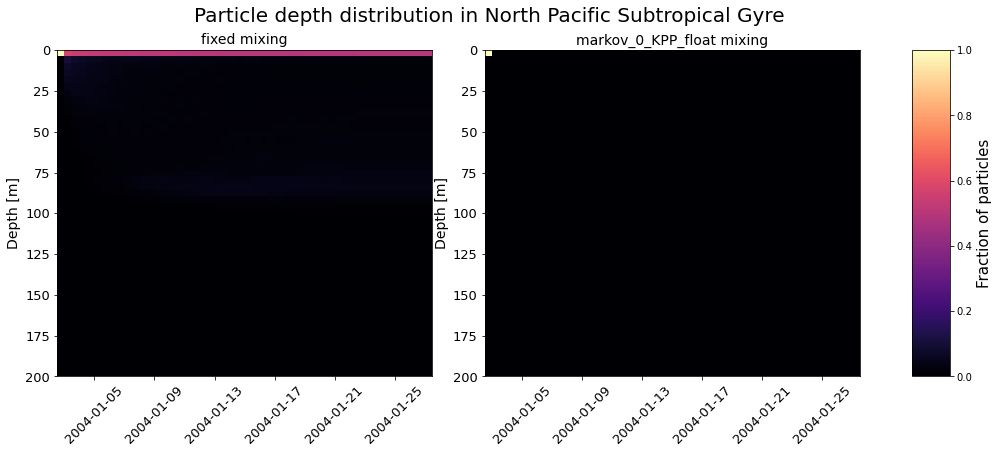

In [59]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Particle depth distribution in '+regions[region], fontsize=20)
gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,0.1], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1,ax2]
for i,ax in enumerate(axes):
    ax.set_facecolor('k')
    pc = ax.pcolormesh(timebins,depthbins,depth_densities[i].T, cmap='magma')
    ax.set_title(mixing[i]+' mixing', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)
    ax.tick_params(axis='x', rotation=45)
    ax.invert_yaxis()
cb = fig.colorbar(pc, cax=ax3)
cb.set_label('Fraction of particles', size=15)

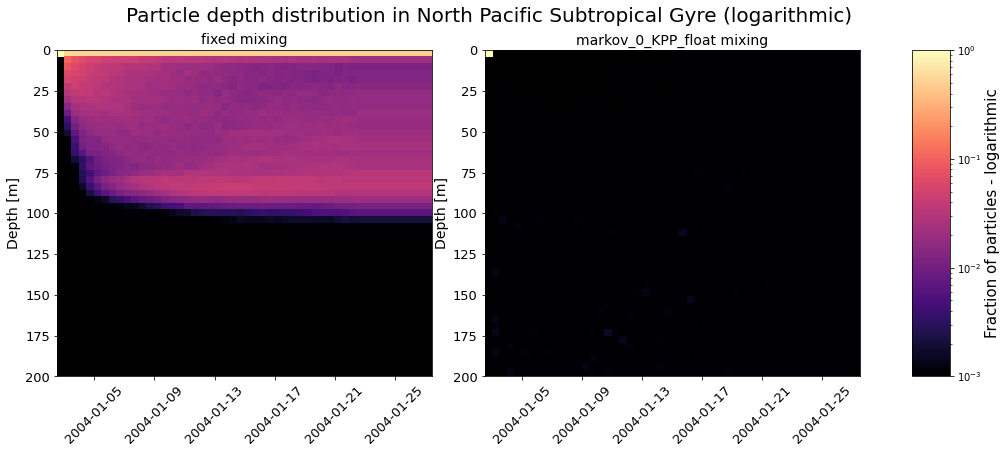

In [60]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)
gs = gridspec.GridSpec(ncols=3, nrows=1, width_ratios=[1,1,0.1], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
axes = [ax1,ax2]
for i,ax in enumerate(axes):
    ax.set_facecolor('k')
    pc = ax.pcolormesh(timebins,depthbins,depth_densities[i].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
    ax.set_title(mixing[i]+' mixing', fontsize=14)
    ax.set_ylabel('Depth [m]', fontsize=14)
    ax.tick_params(axis='both', labelsize=13)
    ax.tick_params(axis='x', rotation=45)
    ax.invert_yaxis()
cb = fig.colorbar(pc, cax=ax3)
cb.set_label('Fraction of particles - logarithmic', size=15)